# Xenograft SA501X3F breast cancer
> data plot and victree fixed tree inference

Data-set with 265 cells over 18170 genomic bins

## Load dataset

In [1]:
import numpy as np
import pandas as pd

bio_df = pd.read_csv("/Users/zemp/phd/scilife/cpt_experiments/CONET/CONET/python/notebooks/biological_data/data/SA501X3F_filtered_corrected_counts.csv")
cell_names = bio_df.filter(like='SA501X3F').columns
bio_df

,chr,start,end,width,candidate_brkp,SA501X3F.00136,SA501X3F.00268,SA501X3F.00324,SA501X3F.00164,SA501X3F.00143,...,SA501X3F.00038,SA501X3F.00103,SA501X3F.00156,SA501X3F.00357,SA501X3F.00314,SA501X3F.00344,SA501X3F.00194,SA501X3F.00302,SA501X3F.00300,SA501X3F.00375
0,1,750001,900000,150000,1,0.788418,0.997561,0.849417,0.958833,0.884363,...,1.460313,1.021588,0.802751,0.844613,1.126179,0.894077,0.886262,1.024218,0.852884,0.809327
1,1,1200001,1350000,150000,1,0.849975,0.706687,1.004793,0.880624,0.953681,...,1.088894,1.172028,0.833906,0.837472,0.831351,0.965090,0.690766,0.823925,0.589073,0.610860
2,1,1350001,1500000,150000,0,0.929382,0.642708,0.742128,0.585840,0.922690,...,0.900067,0.798808,1.036568,1.183317,1.166959,0.634227,1.183463,0.952956,0.469167,1.059823
3,1,1650001,1800000,150000,0,1.343439,0.784339,1.109889,1.091277,0.820710,...,0.665662,0.825962,0.971873,1.058432,0.923954,1.193048,0.779907,0.992012,0.907129,0.803182
4,1,1800001,1950000,150000,0,0.948423,1.101478,1.050133,1.251881,0.925633,...,0.934722,0.877758,0.716137,1.364659,0.931454,1.158391,0.682872,0.807189,0.676003,1.004426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,24,27750001,27900000,150000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18171,24,27900001,28050000,150000,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18172,24,28350001,28500000,150000,0,0.031799,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18173,24,28500001,28650000,150000,0,0.031490,0.109737,0.094692,0.062014,0.041771,...,0.000000,0.134472,0.155070,0.070424,0.054154,0.051420,0.061910,0.096765,0.034072,0.148760


In [2]:
import scgenome.plotting as pl
import anndata

# read as anndata
bio_ad = anndata.AnnData(bio_df[cell_names].to_numpy().T)
bio_ad.layers['copy'] = bio_ad.X
bio_ad.obs_names = cell_names

# map chr to X Y format
chr_codes = {i: str(i) for i in range(1, 23)}
chr_codes[23] = 'X'
chr_codes[24] = 'Y'

# add metadata
bio_ad.var['chr'] = bio_df['chr'].map(chr_codes).values
bio_ad.var['start'] = bio_df['start'].values
bio_ad.var['end'] = bio_df['end'].values
bio_ad.var.head()


,chr,start,end
0,1,750001,900000
1,1,1200001,1350000
2,1,1350001,1500000
3,1,1650001,1800000
4,1,1800001,1950000


Speed up script by selecting only a subset of the chromosomes

In [3]:
# bio_ad = bio_ad[:, bio_ad.var['chr'].isin(['19', '20', '21', '22', 'X'])]

In [4]:
# saturate outliers
perc_thresh = 99.5
q_thresh = np.percentile(bio_ad.X, perc_thresh)
print(f"removed - set to nan - {np.sum(bio_ad.X > q_thresh)} / {bio_ad.X.size}"
      f" outliers: count > {q_thresh:.3f} ({perc_thresh}%)")
bio_ad.layers['copy'][bio_ad.X > q_thresh] = np.nan

removed - set to nan - 23628 / 4725500 outliers: count > 6.349 (99.5%)


/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


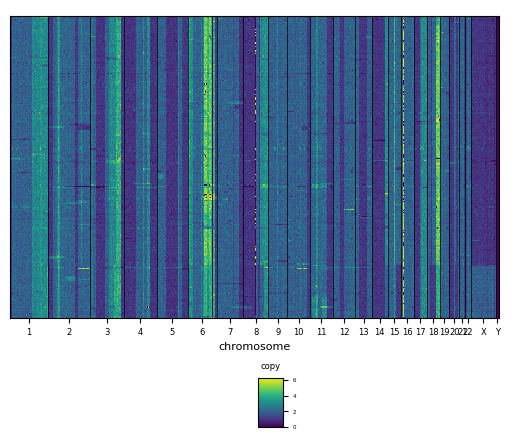

In [5]:
pl.plot_cell_cn_matrix_fig(bio_ad, layer_name='copy', raw=True);

## Load HMMCopy CN calling
> to-do: download or compute it

## Load CONET CN calling
> pre-computed by authors

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


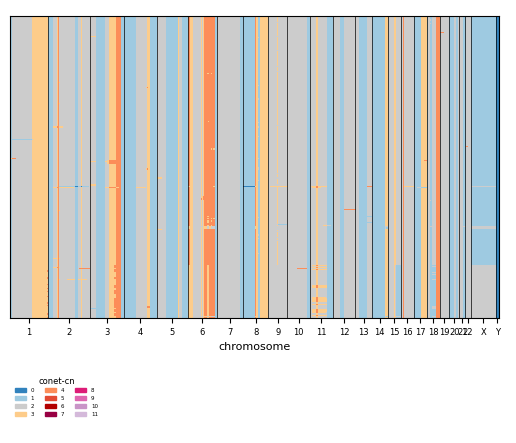

In [6]:
con_cn_df = pd.read_csv("/Users/zemp/phd/scilife/cpt_experiments/CONET/CONET/cn_calling_SA501X3F.csv")
bio_ad.layers['conet-cn'] = con_cn_df[cell_names].to_numpy().T
pl.plot_cell_cn_matrix_fig(bio_ad, layer_name='conet-cn');

## Run VICTree

### Initialization step

In [7]:
import torch
from utils.config import Config
from utils.tree_utils import star_tree
from variational_distributions.joint_dists import JointDist, FixedTreeJointDist
from variational_distributions.var_dists import qCMultiChrom, qMuTau, qEpsilonMulti, qZ
from utils.data_handling import DataHandler

In [ ]:
def cell_cn_calling_from_adata(adata, n_states=7, max_iter=100, rtol=1e-2, step_size=0.2,
                      **custom_params) -> torch.Tensor:
    dh = DataHandler(adata=adata)
    
    cell_config = Config(n_cells=adata.n_obs, n_nodes=adata.n_obs + 1,
                         n_states=n_states, step_size=0.3,
                         chain_length=adata.n_vars, chromosome_indexes=dh.get_chr_idx(),
                         debug=True)
    
    cell_qmt = qMuTau(cell_config, nu_prior=1., lambda_prior=1000., alpha_prior=5000., beta_prior=500.)
    cell_qmt.initialize(method='data', obs=dh.norm_reads)
    
    cell_qc = qCMultiChrom(cell_config)
    cell_qc.initialize(method='random')
    
    cell_qeps = qEpsilonMulti(cell_config, alpha_prior=1., beta_prior=1.)
    cell_qeps.initialize(method='data', obs=dh.norm_reads)  # try varying change_ratio
    # run inference with qmt,cell-qc
    fixed_z = torch.arange(1, adata.n_obs + 1)
    cell_qz_fix = qZ(cell_config, true_params={'z': fixed_z})
    cell_tree = star_tree(adata.n_obs + 1)

    joint_q = FixedTreeJointDist(obs=dh.norm_reads, qc=cell_qc, qpsi=cell_qmt, qeps=cell_qeps, qz=cell_qz_fix)
    i = 0
    convergence = False
    curr_elbo = - np.infty
    print("running inference...")
    while not convergence and i < max_iter:
        print(f"*** {i} ***")
        if i == 0:
            print("computing initial elbo", end="")
            curr_elbo = cell_qc.compute_elbo([cell_tree], [1.], q_eps=cell_qeps)
            print(f": {curr_elbo}")

        print("qmt update")
        cell_qmt.update(cell_qc, cell_qz_fix, dh.norm_reads)
        print("qc update")
        cell_qc.update(dh.norm_reads, cell_qeps, cell_qz_fix, cell_qmt,
                         [cell_tree], [1.])
        print("qeps update")
        cell_qeps.update([cell_tree], torch.tensor([1.]), cell_qc)

        print("computing new elbo")
        new_elbo = cell_qc.compute_elbo([cell_tree], [1.], q_eps=cell_qeps)
        improvement = (new_elbo - curr_elbo) / curr_elbo
        print(f"--- [{i}] elbo: {new_elbo:.3f} (rel impr: {improvement:.3f})")
        if improvement < rtol:
            convergence = True
            print(f"converged after {i} iterations")
        curr_elbo = new_elbo
        i += 1

    return cell_qc.get_viterbi()[1:].numpy()

Running inference on single cells as clones is quite time consuming, although few iterations (6 it, ~10 minutes) are enough
to reach convergence on the qC partial elbo. The issue here is the baseline being wrong for the cells at the bottom.

In [ ]:
# bio_ad.layers['cn-init'] = cell_cn_calling_from_adata(bio_ad)

In [ ]:
# pl.plot_cell_cn_matrix_fig(bio_ad, layer_name='cn-init', max_cn=6);

## Run FixedTree
TODO

In [8]:
from inference.victree import VICTree
from inference import victree

# prepare victree input
config, q, dh = victree.make_input(bio_ad, cc_layer='copy', fix_tree="(((5,4)3,2)1)0",
                                   mt_prior_strength=5., eps_prior_strength=0.5, delta_prior_strength=0.01,
                                   eps_init='data', step_size=0.3, z_init='random', debug=True)
victree = VICTree(config, q, data_handler=dh)
victree.run(100)

 55%|█████▌    | 55/100 [05:44<04:41,  6.26s/it, elbo=-1.79e+6, diff=0.001%, ll=-1746273.750] 


/var/folders/kf/j5d6g9gd4tg5n6vzhr5p_1f00000gn/T/ipykernel_27466/819101075.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bio_ad.layers['viterbi'] = victree.q.c.get_viterbi()[bio_ad.obs['clone']].numpy()
/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


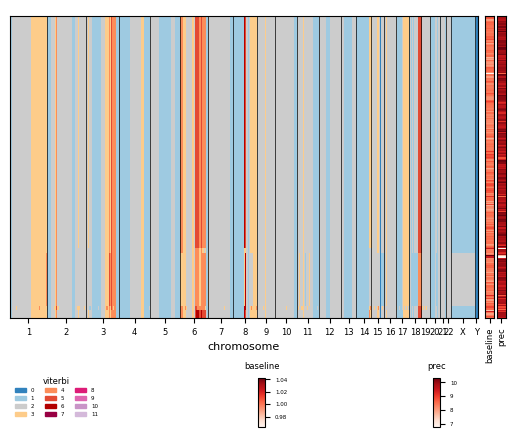

In [16]:
bio_ad.obs['clone'] = victree.q.z.pi.argmax(dim=1).numpy()
bio_ad.obs['baseline'] = victree.q.mt.nu.numpy()
bio_ad.obs['prec'] = victree.q.mt.exp_tau().numpy()
bio_ad.layers['viterbi'] = victree.q.c.get_viterbi()[bio_ad.obs['clone']].numpy()

%matplotlib inline
pl.plot_cell_cn_matrix_fig(bio_ad, layer_name='viterbi', max_cn=config.n_states-1, cell_order_fields=['clone'], annotation_fields=['baseline', 'prec']);

In [12]:
np.abs(bio_ad.layers['viterbi'] - bio_ad.layers['conet-cn']).mean()

0.0757236271294043

Re-plot CONET-cn with victree cell assignment

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


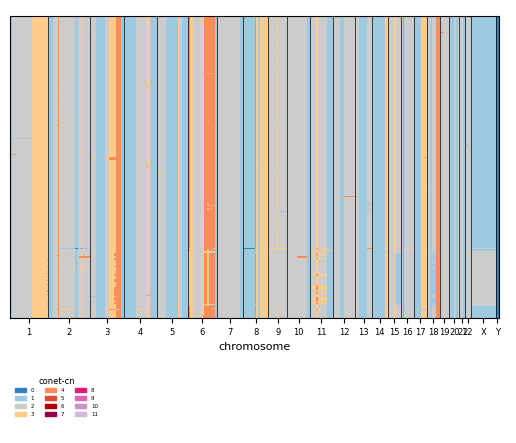

In [13]:
pl.plot_cell_cn_matrix_fig(bio_ad, layer_name='conet-cn', cell_order_fields=['clone']);